# Binary Prediction of Poisonous Mushrooms

### 1. Business Understanding

Source: This dataset will come from the Kaggle competition found at https://www.kaggle.com/competitions/playground-series-s4e8/overview

Goal: The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics.

Evaluation: Submissions are evaluated using the Matthews correlation coefficient (MCC).

Data: There are two datasets, a train and test. The train is present to be able train a model, while the test is to be predicted on with said model and then the predictions will be used for the submission of the competition.

| Target Variable | Definition |
| --- | --- |
| Class | Is the mushroom edible (e) or poisonous (p) |

### 2. Data Understanding

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Warnings
import warnings
warnings.filterwarnings('ignore')


Import Data

In [24]:
# Train Dataset
train = pd.read_csv("train.csv").drop(columns="id")

# Test Dataset
test = pd.read_csv("test.csv")

# View the Datasets
display("Train Dataset", train.head())
display("Test Dataset", test.head())


'Train Dataset'

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


'Test Dataset'

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


Describe Data

In [48]:
display("Info of the Train Data", train.info())
print("=====================================================")
display("Info of Test Data", test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


'Info of the Train Data'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


'Info of Test Data'

None

In [49]:
display("Describe Train Data", train.describe().T.round(4))
print("==================================================================================================================================================================")
display("Describe Test Data", test.describe().T.round(4))

'Describe Train Data'

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3116941.0,6.3098,4.6579,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.3483,2.6998,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,11.1538,8.0955,0.00,4.97,9.65,15.63,102.90


'Describe Test Data'

,count,mean,std,min,25%,50%,75%,max
id,2077964.0,4.155926e+06,599856.6817,3116945.0,3636435.75,4155926.50,4675417.25,5194908.00
cap-diameter,2077957.0,6.306200e+00,4.6855,0.0,3.31,5.74,8.23,607.00
stem-height,2077963.0,6.346500e+00,2.6990,0.0,4.67,5.88,7.41,57.29
stem-width,2077964.0,1.114840e+01,8.1002,0.0,4.97,9.64,15.62,102.91


In [50]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
display("Unique Categories by Categorical Variable in Train", train[categorical_cols].nunique())

print("==========================================================")

categorical_cols = test.select_dtypes(include=['object', 'category']).columns
display("Unique Categories by Categorical Variable in Test", test[categorical_cols].nunique())

'Unique Categories by Categorical Variable in Train'

class                    2
cap-shape               74
cap-surface             83
cap-color               78
does-bruise-or-bleed    26
gill-attachment         78
gill-spacing            48
gill-color              63
stem-root               38
stem-surface            60
stem-color              59
veil-type               22
veil-color              24
has-ring                23
ring-type               40
spore-print-color       32
habitat                 52
season                   4
dtype: int64

'Unique Categories by Categorical Variable in Test'

cap-shape               62
cap-surface             59
cap-color               57
does-bruise-or-bleed    22
gill-attachment         66
gill-spacing            35
gill-color              56
stem-root               31
stem-surface            54
stem-color              55
veil-type               15
veil-color              23
has-ring                23
ring-type               36
spore-print-color       33
habitat                 39
season                   4
dtype: int64

Exploratory Data Analysis

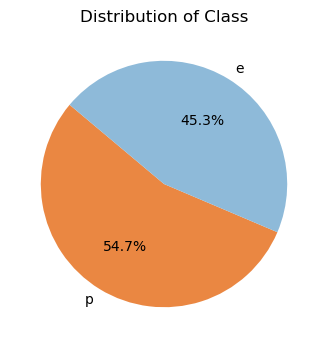

In [51]:
# Count the occurrences of each class
class_counts = train['class'].value_counts()

# Define colors
colors = ['#ea8742', '#8ebad9']

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Distribution of Class")
plt.show()

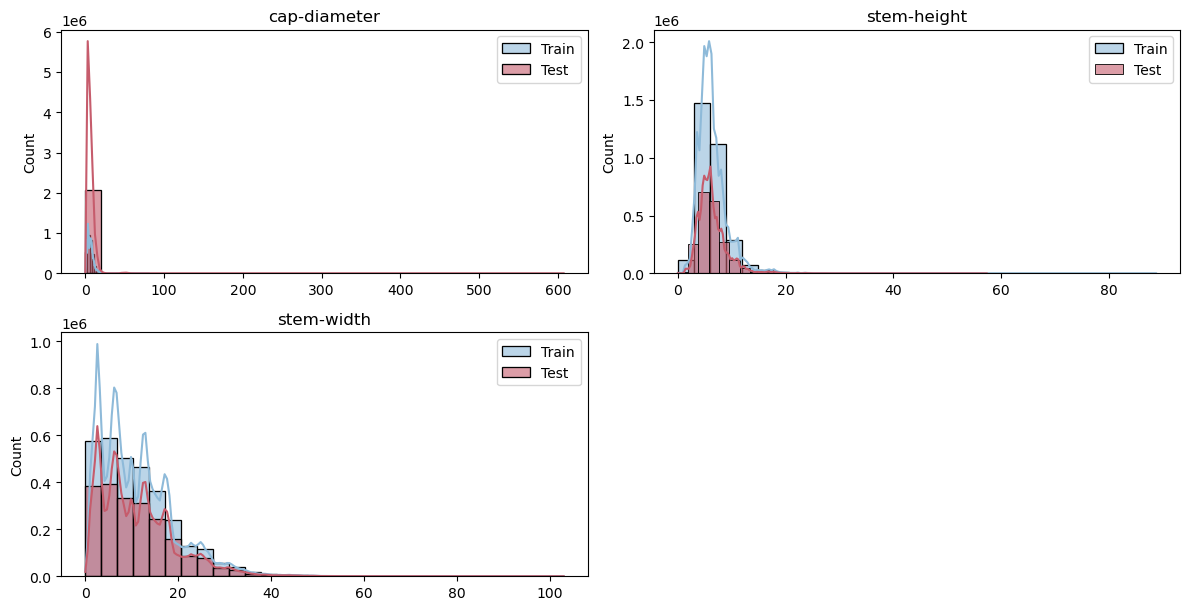

In [53]:
train_cols = train.select_dtypes(include=['number']).columns.tolist()
test_cols = test.select_dtypes(include=['number']).columns.tolist()

# Find common columns between train and test
common_cols = [col for col in train_cols if col in test_cols]

# Set up the figure size
plt.figure(figsize=(12, len(common_cols) * 3))

# Plot histograms for each common numerical column
for i, col in enumerate(common_cols, 1):
    plt.subplot(len(common_cols), 2, i)
    sns.histplot(train[col], bins=30, kde=True, color="#8ebad9", label="Train", alpha=0.6)
    sns.histplot(test[col], bins=30, kde=True, color="#c65c6c", label="Test", alpha=0.6)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Bins set by Equal Frequency


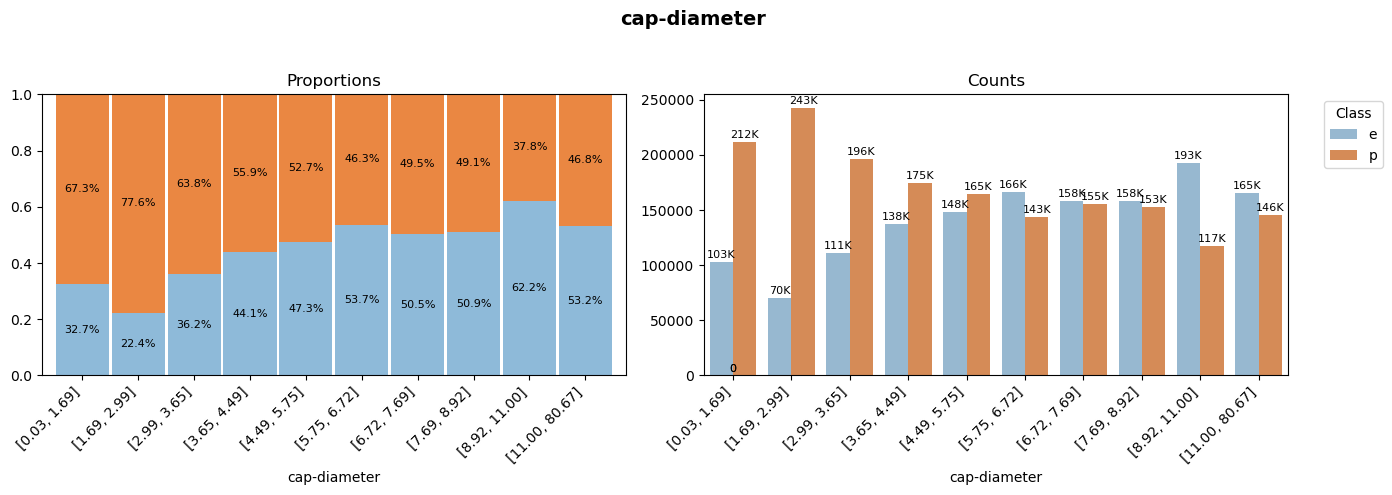

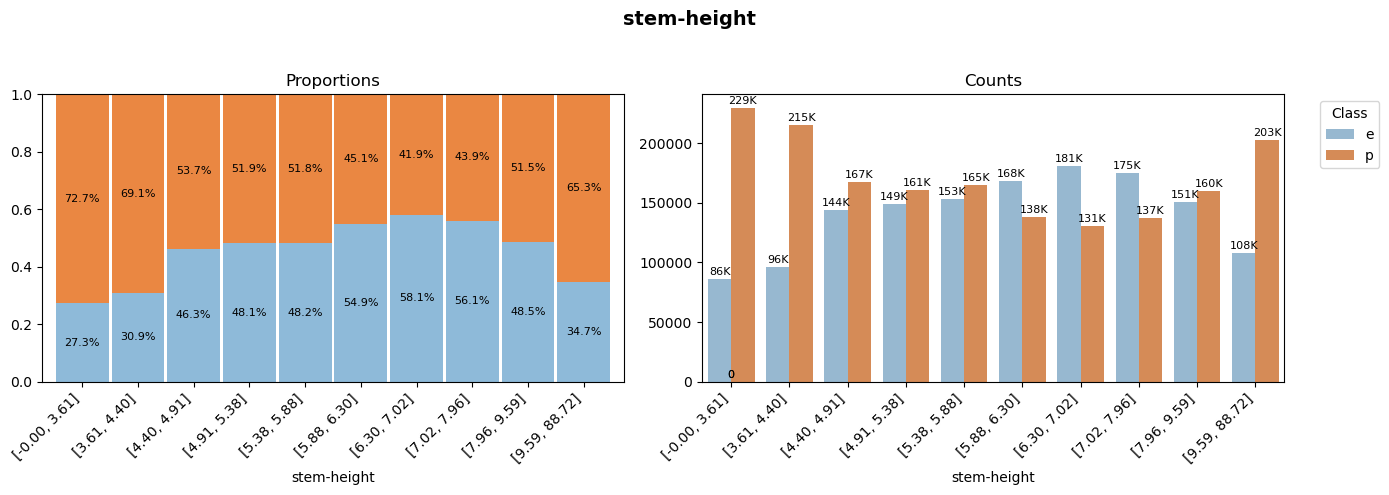

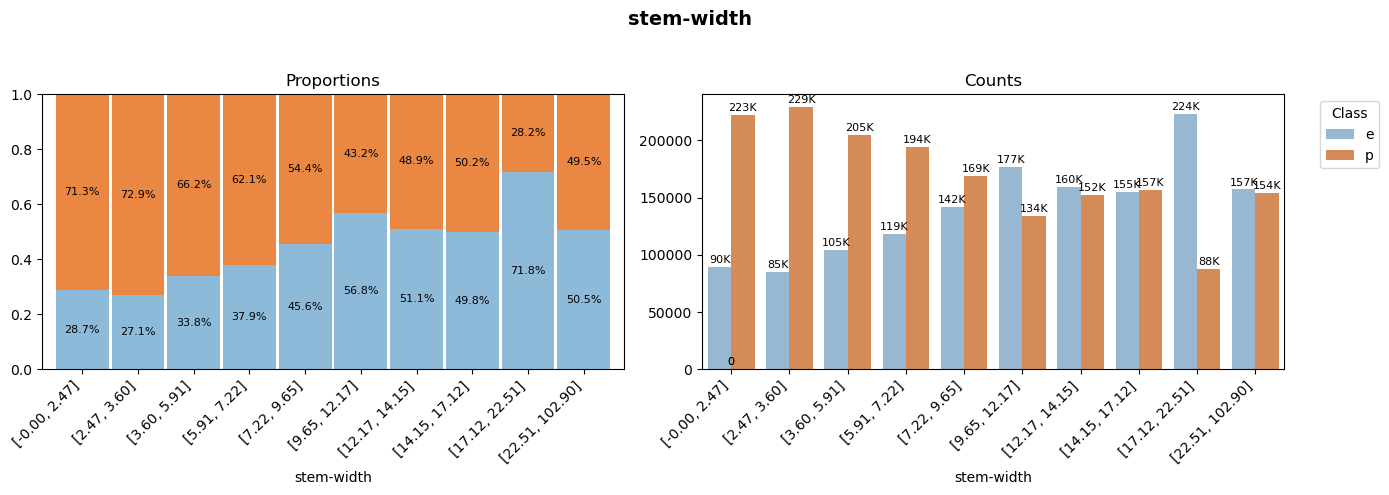

In [ ]:
numeric_columns = train.select_dtypes(include=['number']).columns

print("Bins set by Equal Frequency")

# Loop through each numeric column
for col in numeric_columns:
    # Copy the DataFrame for each numeric column
    train2 = train.copy()
    train2['bin'] = pd.qcut(train2[col], q=10, duplicates='drop')
    train2['bin'] = train2['bin'].apply(lambda x: f"[{x.left:.2f}, {x.right:.2f}]")

    # Get counts for each bin and class
    bin_counts = train2.groupby(['bin', 'class']).size().unstack().fillna(0)
    bin_props = bin_counts.div(bin_counts.sum(axis=1), axis=0)
    bin_props = bin_props.reset_index()

    # Create a new figure for each numeric column
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{col}", fontsize=14, fontweight='bold')  # Add title above both plots

    # Plot 1: Stacked Bar Chart for Proportions
    ax1 = bin_props.plot(x="bin", kind='bar', stacked=True, color=["#8ebad9", "#ea8742"], width=0.95, ax=axes[0])
    for i, bin_label in enumerate(bin_props["bin"]):
        bottom = 0
        for class_label in bin_props.columns[1:]:
            proportion = bin_props.loc[i, class_label]
            if proportion > 0:
                ax1.text(i, bottom + proportion / 2, f"{proportion:.1%}",
                         ha='center', va='center', fontsize=8, color='black')
            bottom += proportion
    ax1.set_title(f"Proportions")
    ax1.set_xlabel(f"{col}")
    ax1.set_ylabel("")
    ax1.set_ylim(0, 1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
    ax1.legend().remove()

    # Plot 2: Count Bar Chart with Abbreviated Counts
    bin_counts = bin_counts.reset_index()
    ax2 = sns.barplot(data=bin_counts.melt(id_vars='bin', var_name='class', value_name='count'),
                      x='bin', y='count', hue='class', dodge=True, palette=["#8ebad9", "#ea8742"], ax=axes[1])

    for p in ax2.patches:
        count = int(p.get_height())
        if count >= 1000:
            count_text = f'{count / 1000:.0f}K'
        else:
            count_text = str(count)
        ax2.annotate(count_text,
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=8, color='black',
                     xytext=(0, 5), textcoords='offset points')
    ax2.set_title(f"Counts")
    ax2.set_xlabel(f"{col}")
    ax2.set_ylabel("")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
    ax2.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for the suptitle

    # Show the plots
    plt.show()

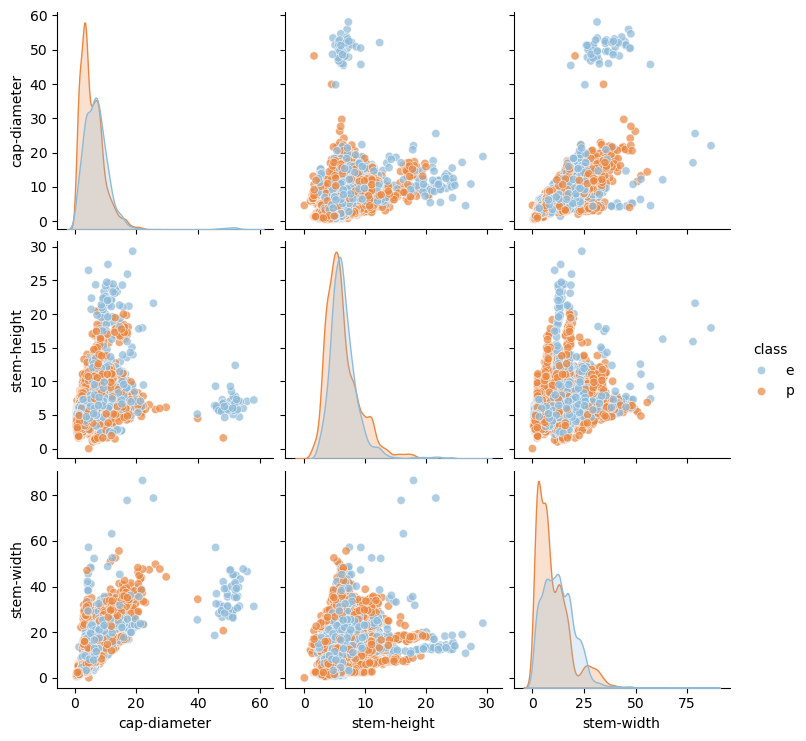

In [ ]:
custom_palette = {"p": "#ea8742", "e": "#8ebad9"}
sns.pairplot(train.head(10000), hue = "class", palette=custom_palette, plot_kws={'alpha': 0.7})

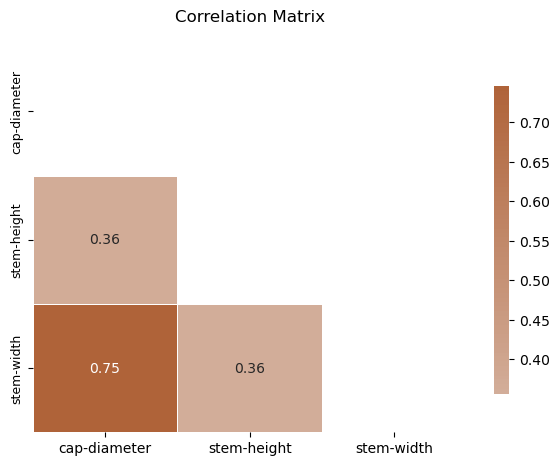

In [ ]:
numeric_cols = train.select_dtypes(include=["number"])

plt.style.use("default")
corr_mat = numeric_cols.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Create figure
f, ax = plt.subplots(figsize=(7, 5))

# Plot heatmap with labels
sns.heatmap(
    corr_mat,
    mask=mask,
    cbar=True,
    cmap=cmap,
    center=0,
    square=False,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Formatting
plt.title("Correlation Matrix\n")
plt.yticks(fontsize=9)

# Show plot
plt.show()

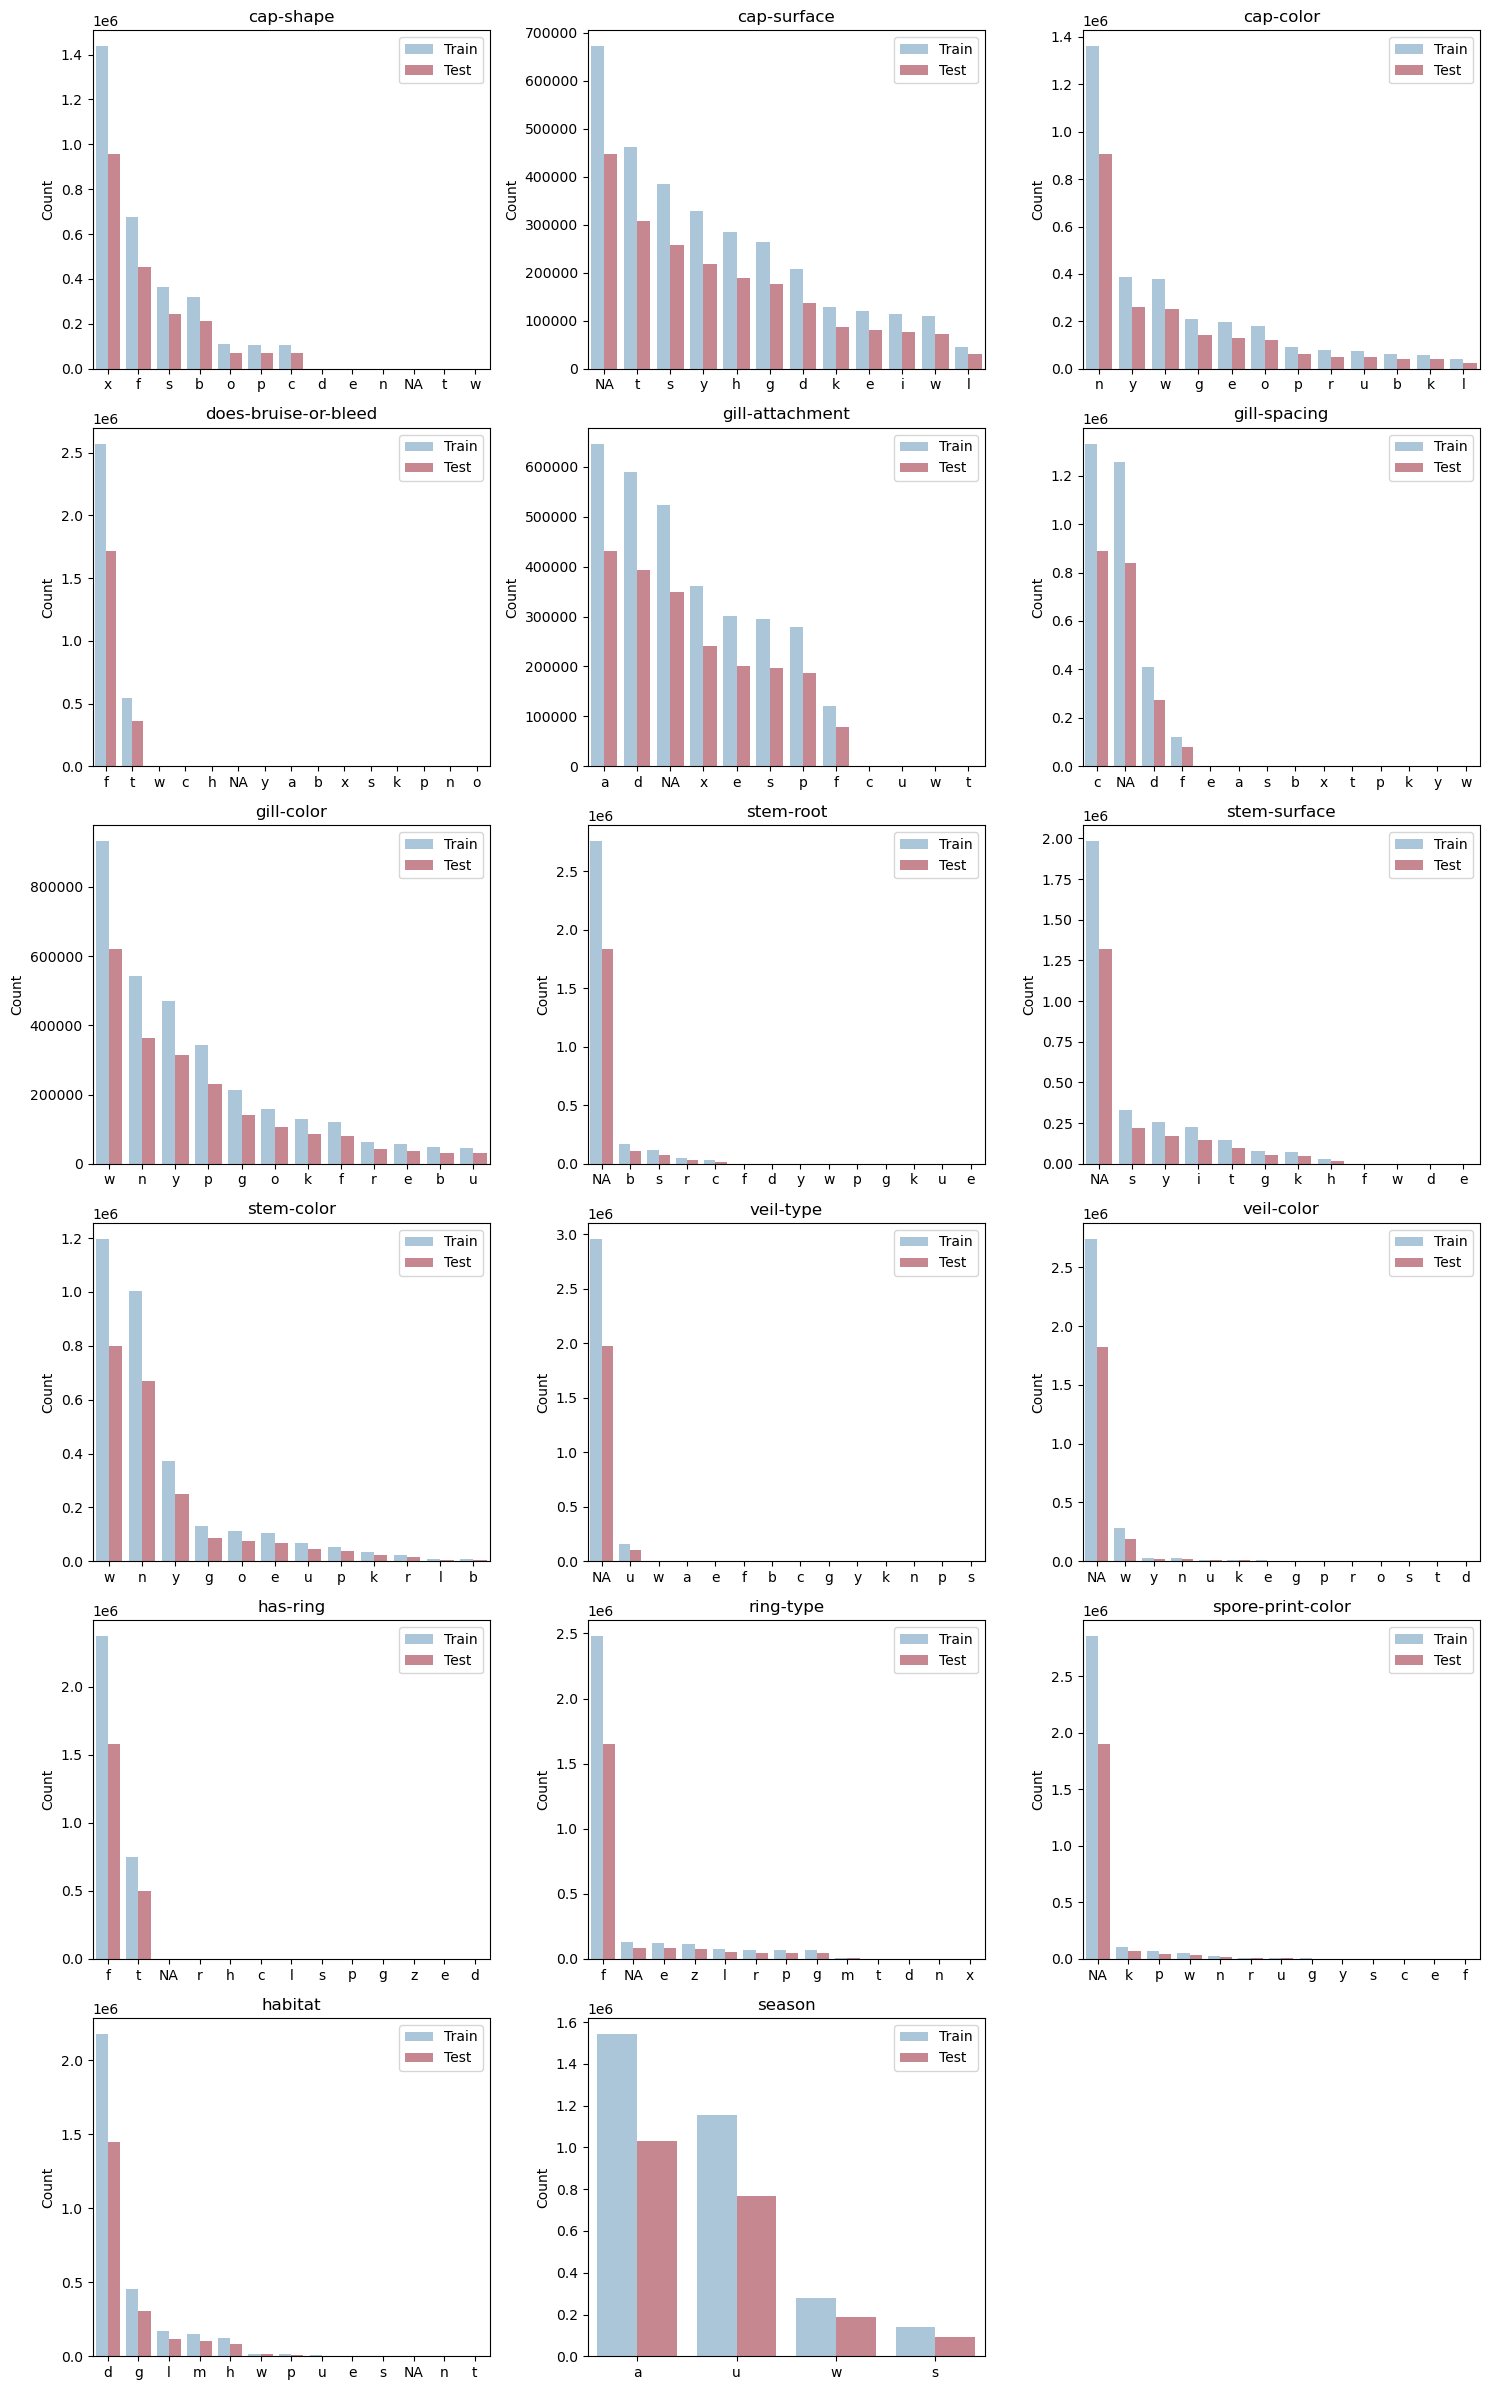

In [ ]:
categorical_cols = train.select_dtypes(include=["object"]).columns

# Find common categorical columns between train and test
common_categorical_cols = [col for col in categorical_cols if col in test.columns]

# Set up figure size (3 columns per row)
n_cols = 3
n_rows = (len(common_categorical_cols) // n_cols) + (len(common_categorical_cols) % n_cols > 0)

plt.figure(figsize=(15, n_rows * 4))  # Increase figure height for better readability

# Loop through common categorical columns and create bar plots
for i, col in enumerate(common_categorical_cols, 1):
    # Fill missing values with "NA"
    train_filled = train.fillna("NA")
    test_filled = test.fillna("NA")

    # Get the top 12 value counts for both train and test
    top_12_train = train_filled[col].value_counts().head(12)
    top_12_test = test_filled[col].value_counts().head(12)

    # Create a DataFrame for Seaborn (long format)
    df_train = pd.DataFrame({"Category": top_12_train.index, "Count": top_12_train.values, "Dataset": "Train"})
    df_test = pd.DataFrame({"Category": top_12_test.index, "Count": top_12_test.values, "Dataset": "Test"})

    df_combined = pd.concat([df_train, df_test])  # Combine train & test data

    # Create subplot
    plt.subplot(n_rows, n_cols, i)
    
    # Side-by-side bar plot using hue="Dataset"
    sns.barplot(x="Category", y="Count", hue="Dataset", data=df_combined, alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})

    # Formatting
    plt.title(f"{col}")
    plt.xlabel("")
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

Any missing data is placed into a group named 'NA'.
All categories making up less than 1% of the total rows are merged together into a group named 'Other'.


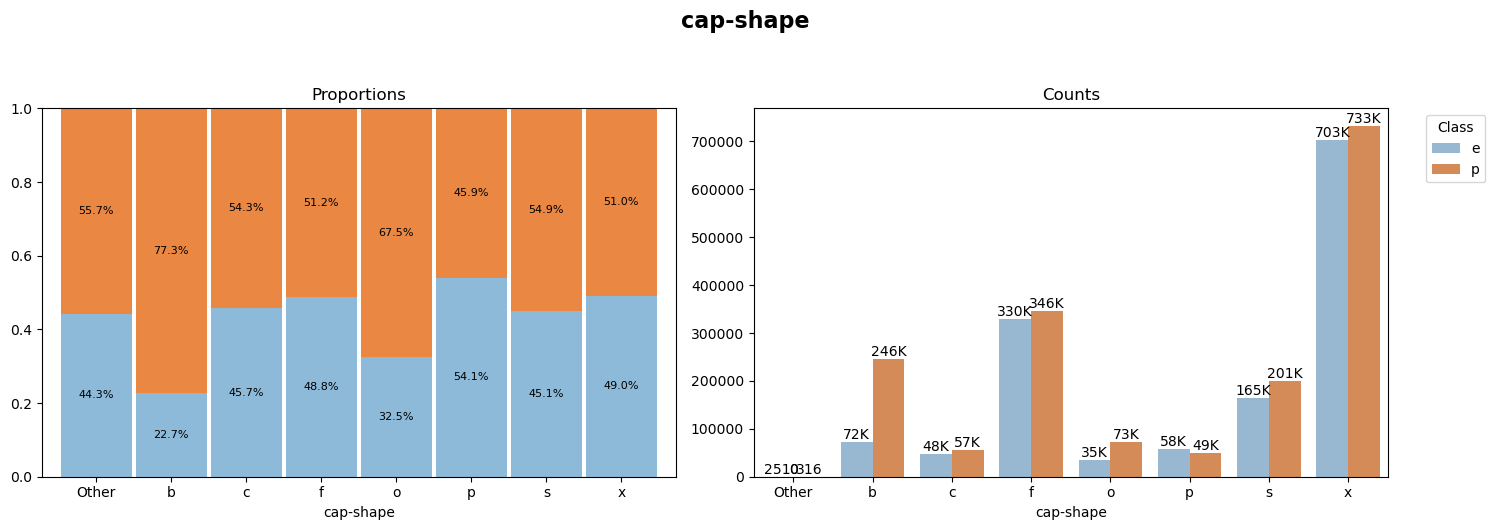

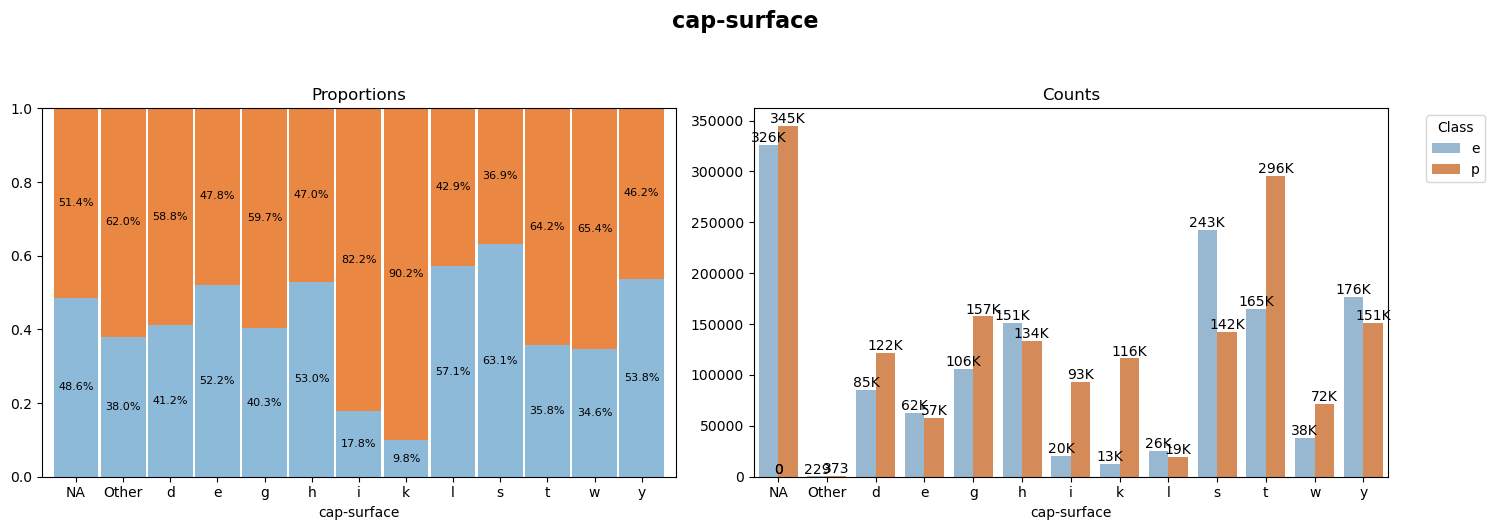

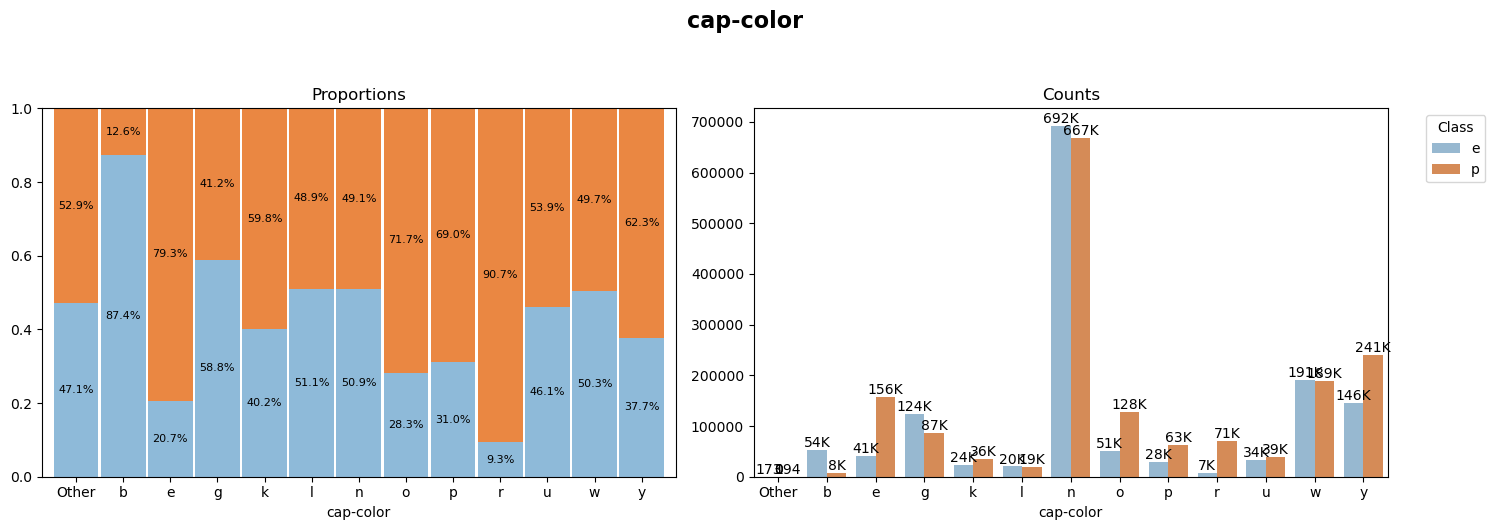

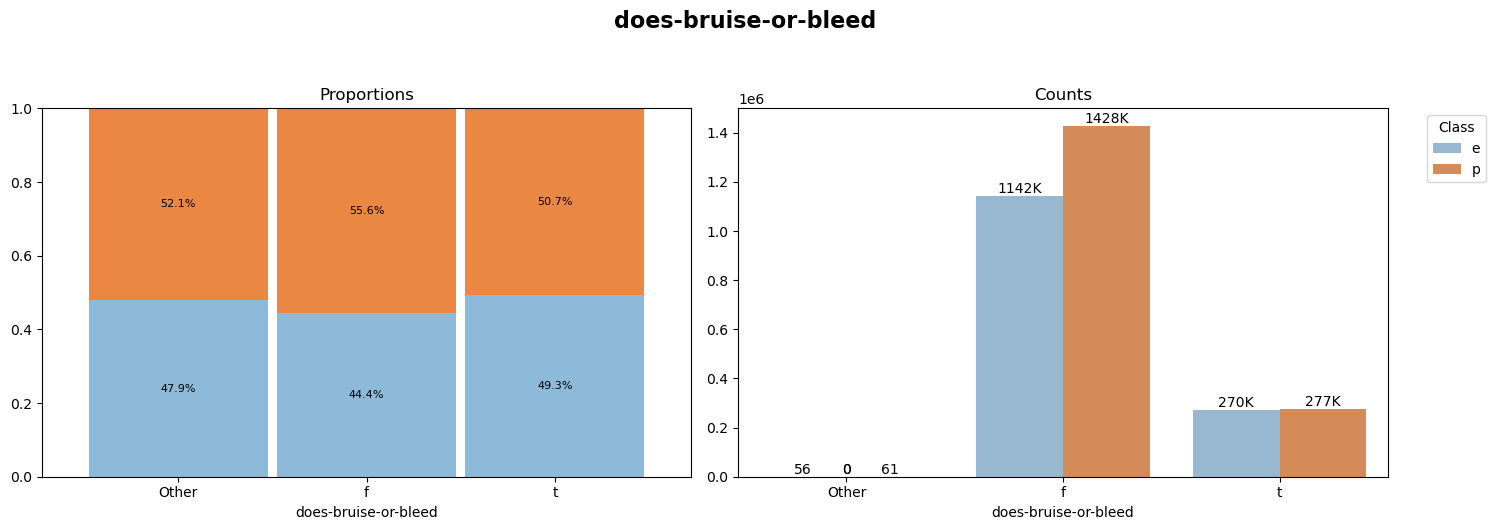

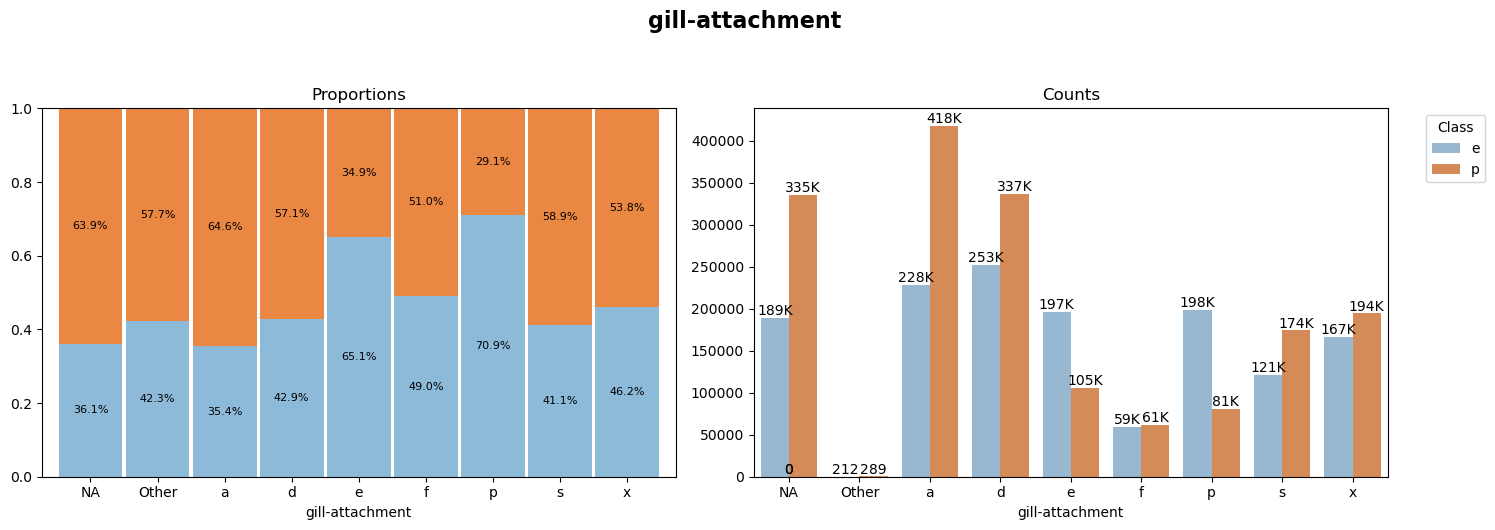

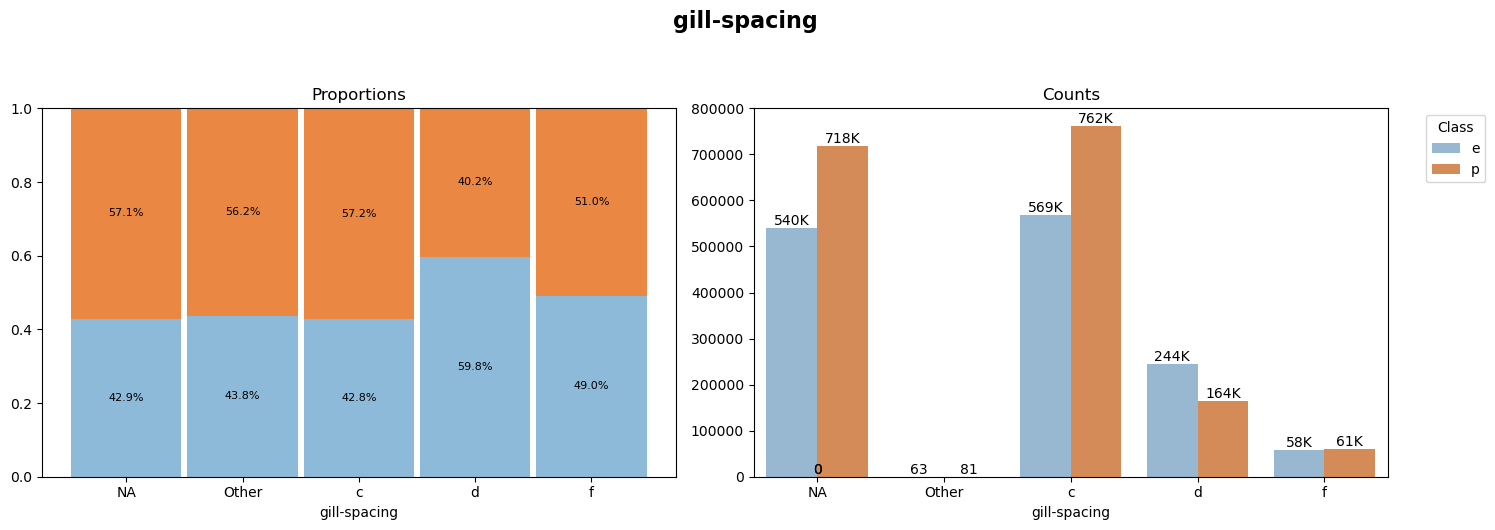

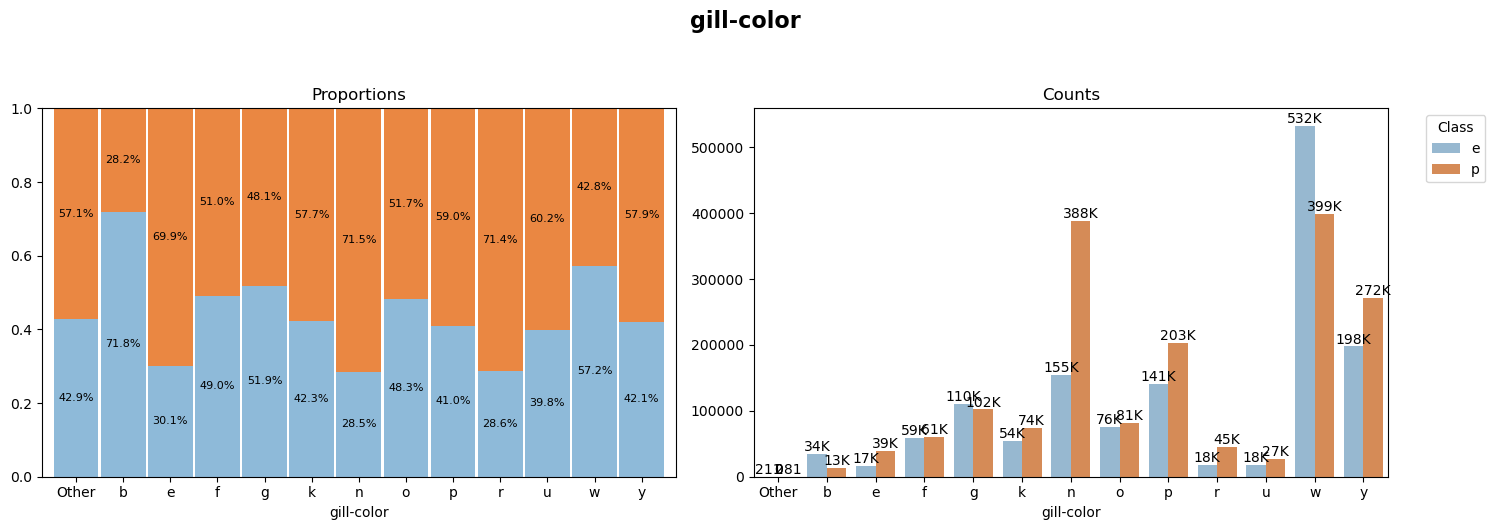

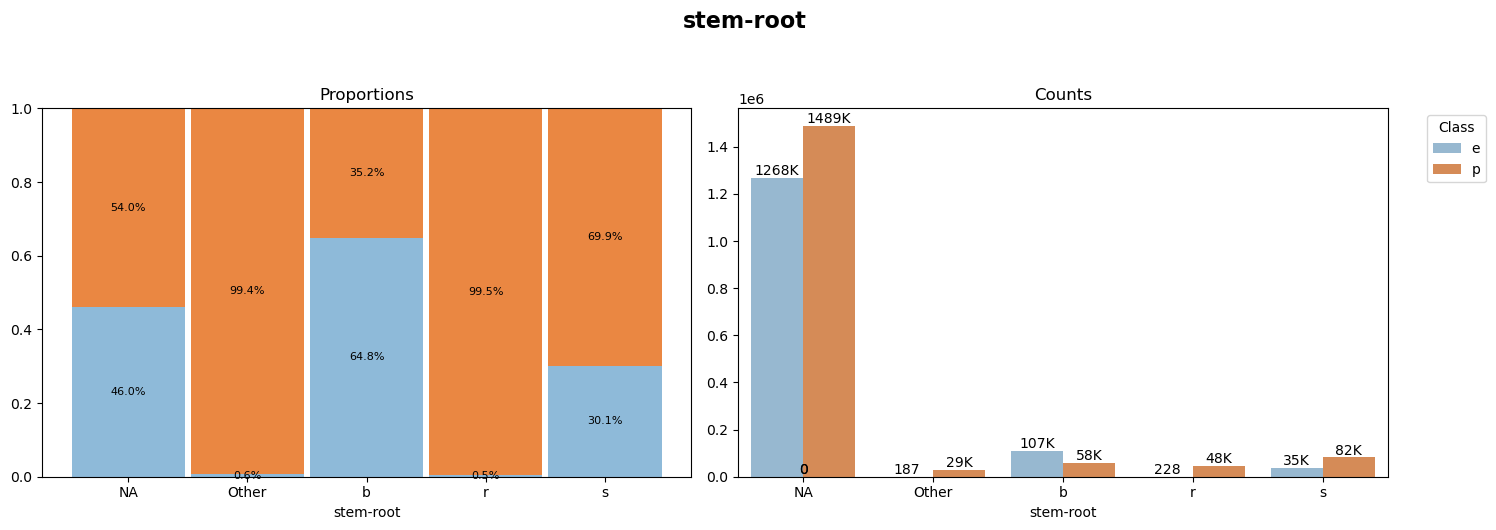

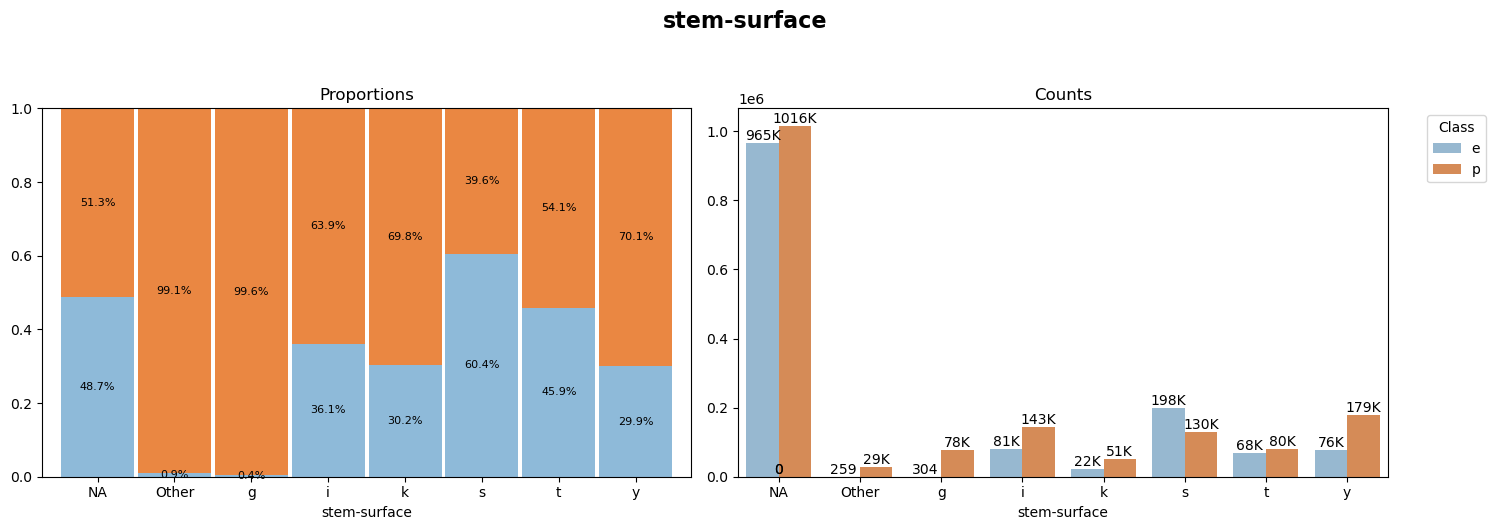

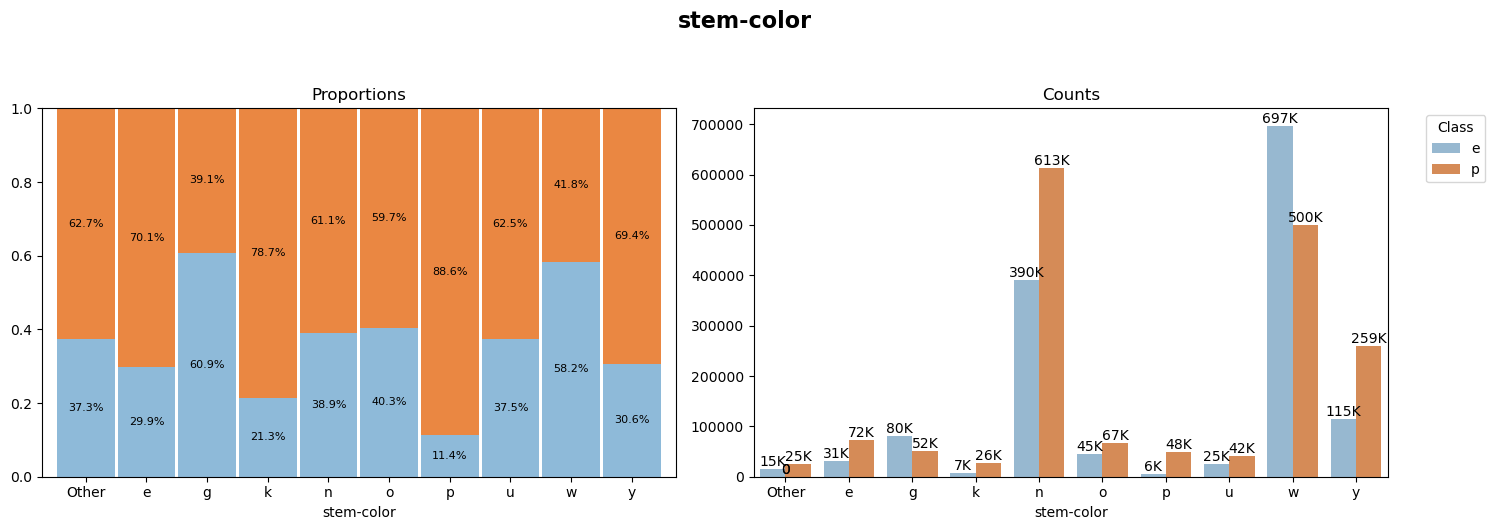

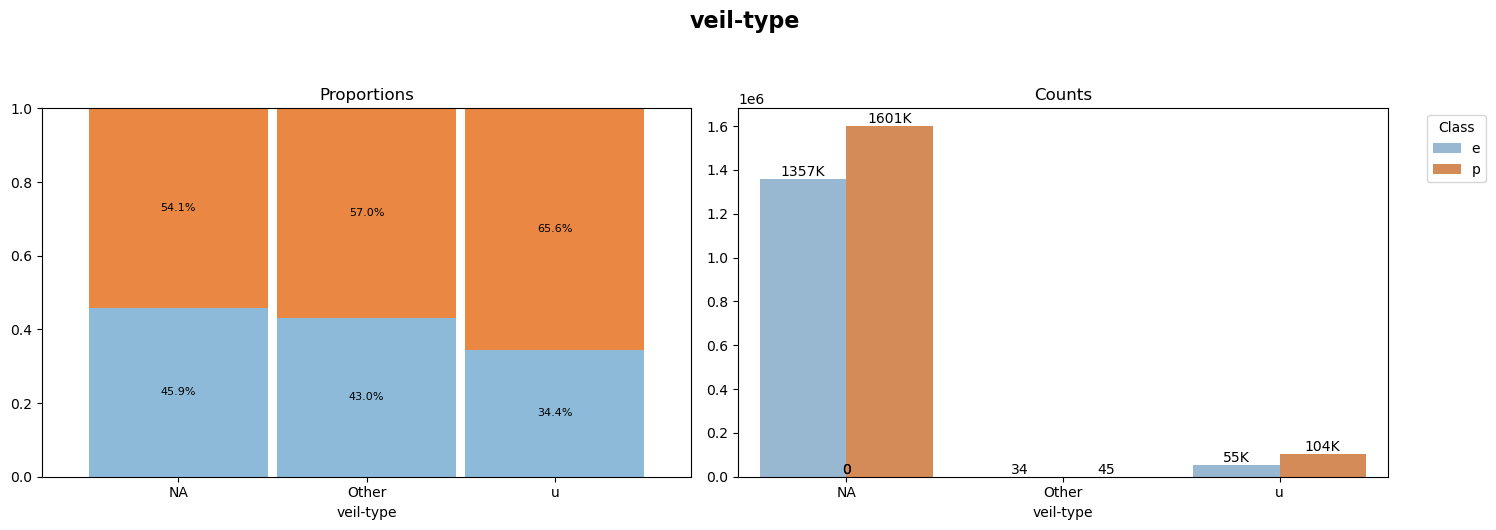

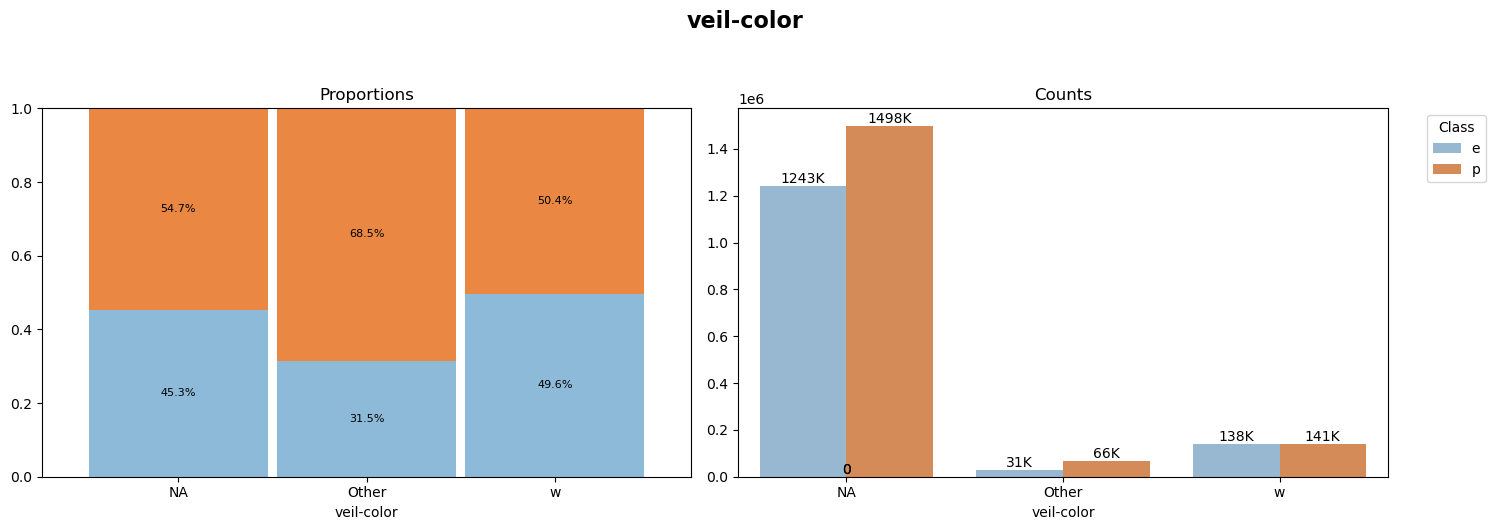

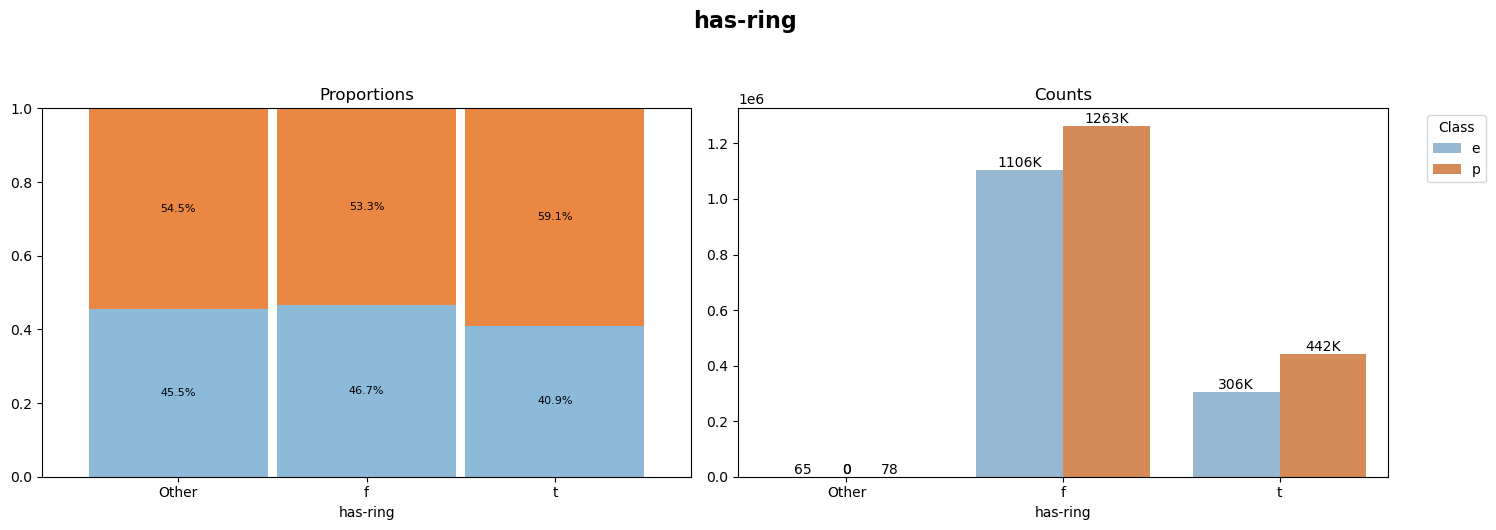

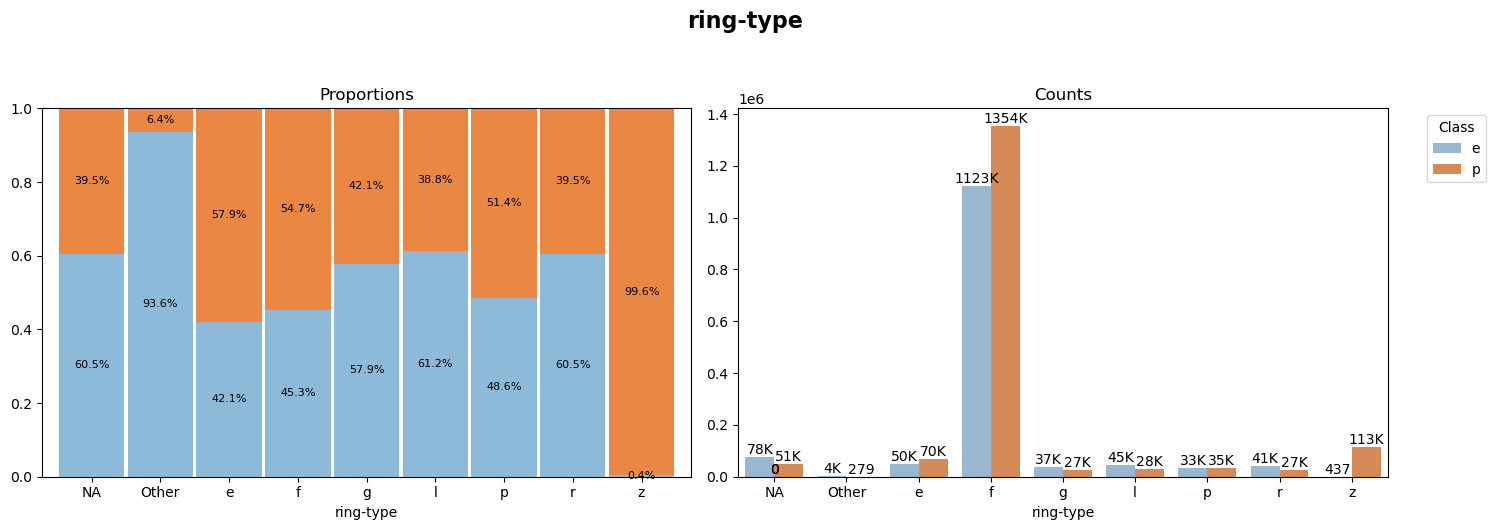

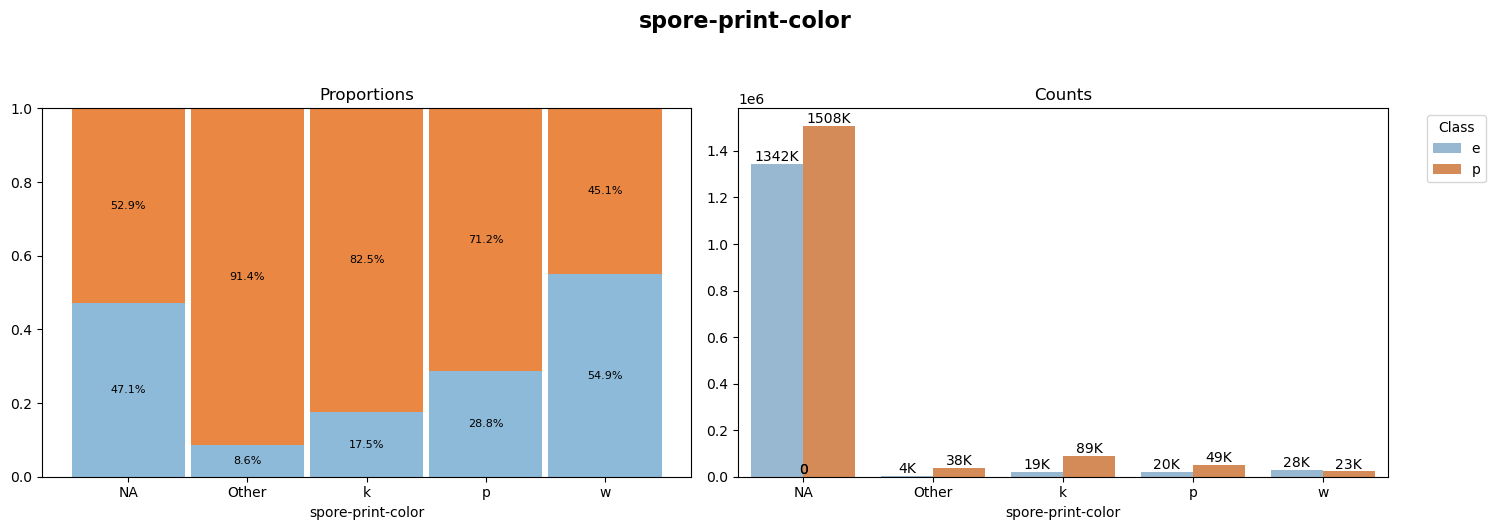

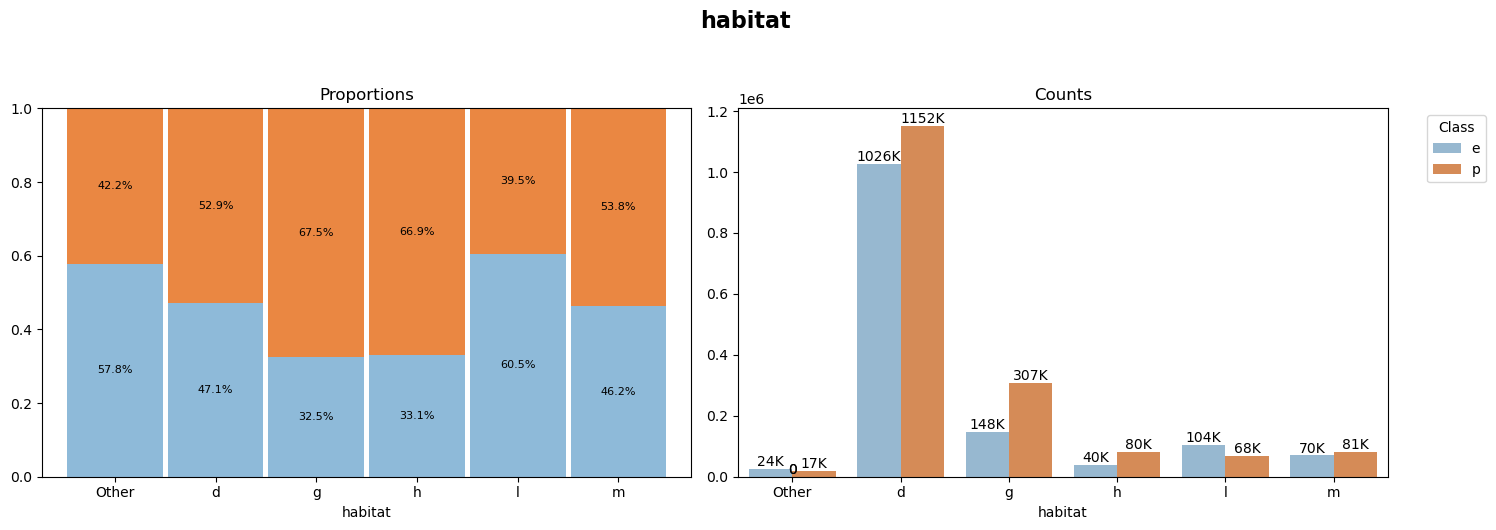

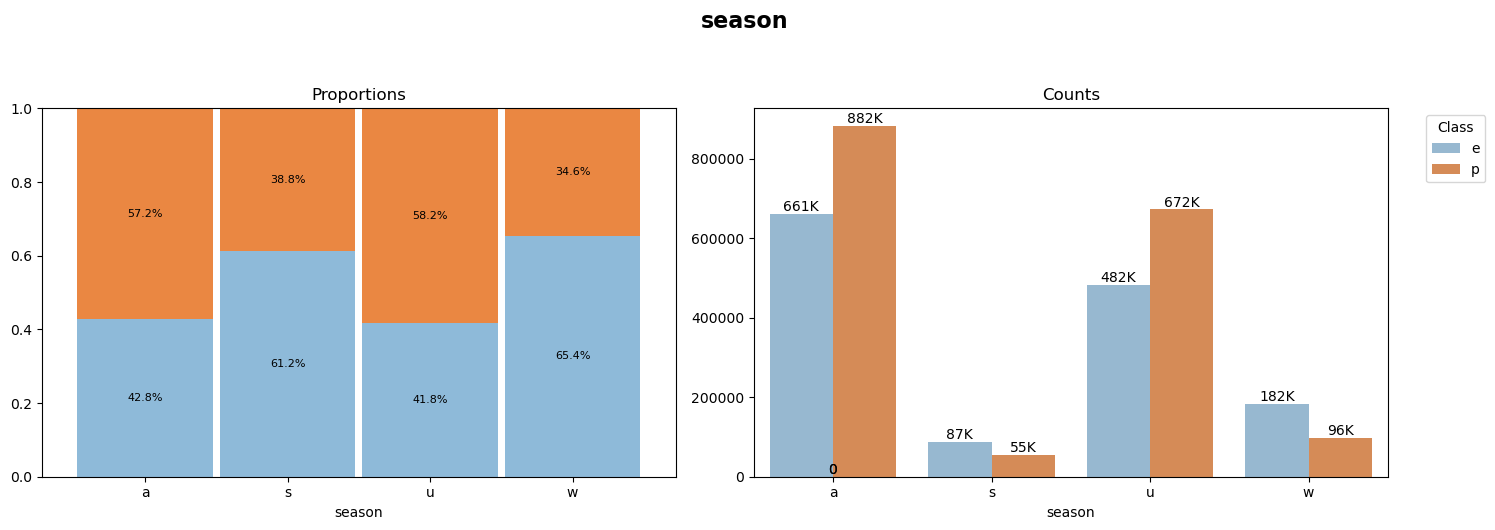

In [ ]:
categorical_cols = train.select_dtypes(include=["object"]).columns.drop("class")

# Set threshold for small categories
threshold = 0.01 * len(train)

print("Any missing data is placed into a group named 'NA'.")
print("All categories making up less than 1% of the total rows are merged together into a group named 'Other'.")

# Create a figure for each categorical column
for col in categorical_cols:
    # Make a copy of the data
    train2 = train.copy()

    # Fill missing values with "NA"
    train2 = train2.fillna("NA")

    # Compute total count per category in the current categorical column
    season_counts = train2[col].value_counts()

    # Identify categories below the threshold
    small_categories = season_counts[season_counts < threshold].index

    # Replace small categories with "Other"
    train2[col] = train2[col].replace(small_categories, "Other")

    # Compute counts of class within each category (after grouping small categories)
    category_counts = train2.groupby([col, "class"]).size().unstack().fillna(0)

    # Convert counts to proportions (normalize each category)
    category_props = category_counts.div(category_counts.sum(axis=1), axis=0).reset_index()

    # Set up the figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f"{col}", fontsize=16, fontweight='bold', y=1.05)

    # Plot 1: 100% stacked bar chart (Proportions by category)
    ax1 = category_props.plot(x=col, kind="bar", stacked=True, 
                              color=["#8ebad9", "#ea8742"], width=0.95, ax=axes[0])

    # Add proportion labels inside bars
    for i, category_label in enumerate(category_props[col]):
        bottom = 0  # Initialize bottom stacking
        for class_label in category_props.columns[1:]:  # Skip category column
            proportion = category_props.loc[i, class_label]
            if proportion > 0:
                ax1.text(i, bottom + proportion / 2, f"{proportion:.1%}",
                         ha='center', va='center', fontsize=8, color='black')
            bottom += proportion  # Stack the next segment above

    # Formatting for stacked bar chart
    ax1.set_title("Proportions")
    ax1.set_xlabel(f"{col}")
    ax1.set_ylabel("")
    ax1.set_ylim(0, 1)  # Ensure y-axis is proportion-based
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.legend().remove()  # Remove legend for a cleaner look

    # Plot 2: Dodged bar chart (Counts by class and category)
    category_counts = train2.groupby([col, "class"]).size().reset_index(name="count")

    # Plot dodged bar chart
    ax2 = sns.barplot(x=col, y="count", hue="class", data=category_counts, dodge=True, palette=["#8ebad9", "#ea8742"], ax=axes[1])

    # Add labels at the top of each bar, abbreviated to "K"
    for p in ax2.patches:
        count = p.get_height()
        if count >= 1000:
            count_text = f'{count / 1000:.0f}K'
        else:
            count_text = str(int(count))  # For values below 1000, no 'K'
        
        ax2.annotate(count_text,
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top center
                     ha='center', va='center', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')  # Slight offset to avoid overlap with the bar

    # Formatting for dodged bar chart
    ax2.set_title("Counts")
    ax2.set_xlabel(f"{col}")
    ax2.set_ylabel("")
    ax2.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

## 3. Feature Engineering and Selection

Missing Data

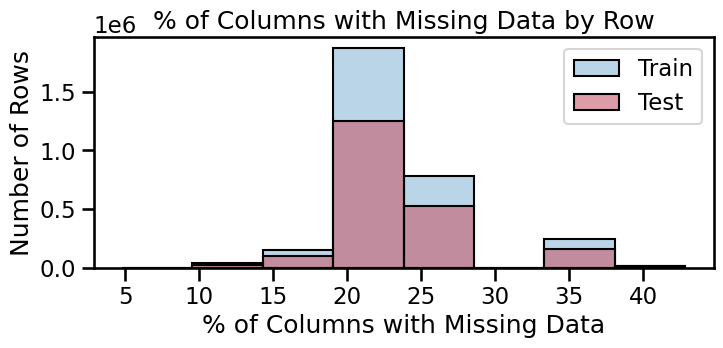

In [25]:
train_null_pct = train.isnull().mean(axis=1) * 100
test_null_pct = test.isnull().mean(axis=1) * 100  # Assuming 'test' DataFrame exists

# Plot histogram with overlay
plt.figure(figsize=(8, 3))
sns.histplot(train_null_pct, binwidth=5, kde=False, color='#8ebad9', label='Train', alpha=0.6)
sns.histplot(test_null_pct, binwidth=5, kde=False, color='#c65c6c', label='Test', alpha=0.6)

# Labels and title
plt.xlabel("% of Columns with Missing Data")
plt.ylabel("Number of Rows")
plt.title("% of Columns with Missing Data by Row")
plt.legend()
plt.show()

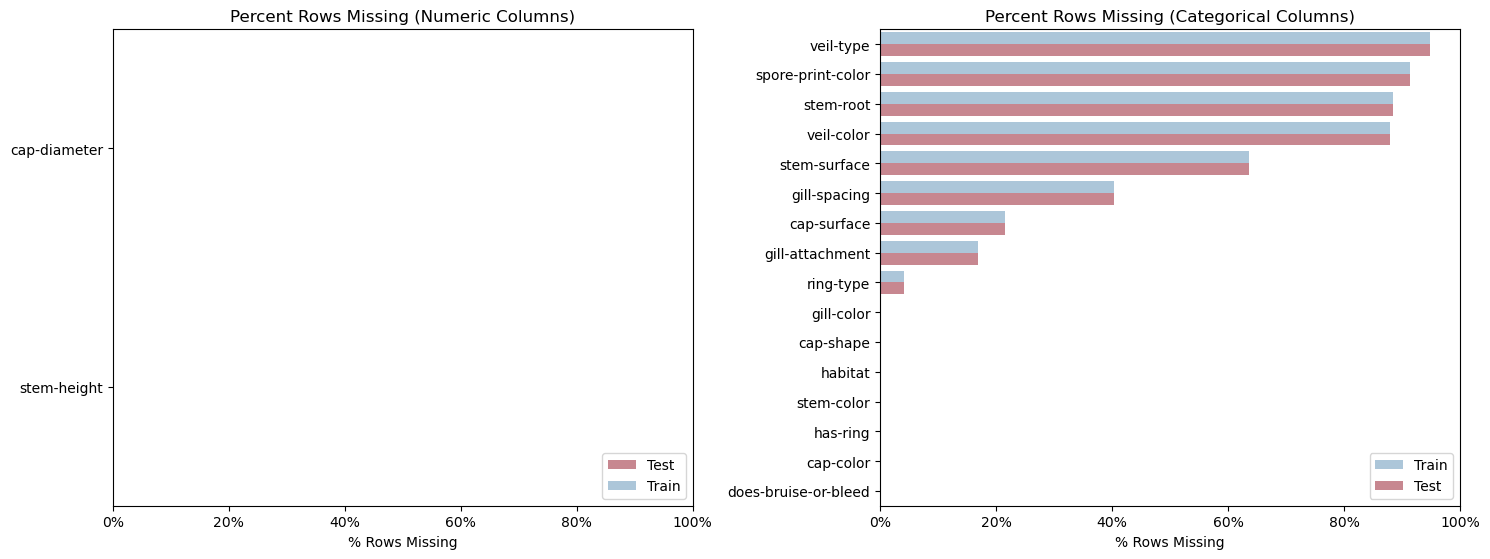

In [ ]:
import matplotlib.ticker as mtick

def missing_percentage(df, dataset_name):
    return df.isna().mean().to_frame(name=dataset_name) * 100

# Get missing values for train and test datasets
missing_train = missing_percentage(train, 'Train')
missing_test = missing_percentage(test, 'Test')

# Combine results for numeric columns
result = pd.concat([missing_train, missing_test], axis=1)

# Add column for data type of each
result["Data Type"] = train.dtypes

# Filter only numeric columns (float64)
result_num = result[result["Data Type"] == "float64"].drop(columns="Data Type")

# Reshape result_num to long format
result_num = result_num.reset_index().melt(id_vars="index", var_name="Dataset", value_name="Missing_Percent")

# Rename columns for clarity
result_num = result_num.rename(columns={"index": "Column"})

# Only keep columns that have missing data in either train or test
result_num = result_num[result_num["Missing_Percent"] > 0]

# Sort by Missing_Percent in descending order
result_num = result_num.sort_values(by="Missing_Percent", ascending=False)

# Filter only categorical columns (Object type)
result_cat = result[result["Data Type"] == "object"].drop(columns="Data Type")

# Reshape result_cat to long format
result_cat = result_cat.reset_index().melt(id_vars="index", var_name="Dataset", value_name="Missing_Percent")

# Rename columns for clarity
result_cat = result_cat.rename(columns={"index": "Column"})

# Only keep columns that have missing data in either train or test
result_cat = result_cat[result_cat["Missing_Percent"] > 0]

# Sort by Missing_Percent in descending order
result_cat = result_cat.sort_values(by="Missing_Percent", ascending=False)

# Create figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for numeric columns
sns.barplot(y="Column", x="Missing_Percent", hue="Dataset", data=result_num, ax=axes[0], alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})
axes[0].set_xlabel("% Rows Missing")
axes[0].set_ylabel("")
axes[0].set_title("Percent Rows Missing (Numeric Columns)")
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[0].set_xlim(0, 100)
axes[0].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Plot for categorical columns
sns.barplot(y="Column", x="Missing_Percent", hue="Dataset", data=result_cat, ax=axes[1], alpha=0.8, palette={"Train": "#8ebad9", "Test": "#c65c6c"})
axes[1].set_xlabel("% Rows Missing")
axes[1].set_ylabel("")
axes[1].set_title("Percent Rows Missing (Categorical Columns)")
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
axes[1].set_xlim(0, 100)
axes[1].legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()

In [26]:
# Drop columns with 80%+ missing data
threshold = 0.8
missing_percent = train.isnull().mean()
columns_to_drop = missing_percent[missing_percent > threshold].index
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)
print(f"Dropped {len(columns_to_drop)} columns with over {threshold*100}% missing values.")

# Identify categorical and numeric columns
cat_cols = train.select_dtypes(include=['object', 'category']).columns.drop("class")
num_cols = train.select_dtypes(include=['number']).columns

# Fill categorical columns with 'Missing' in both train and test
train[cat_cols] = train[cat_cols].fillna("Missing")
test[cat_cols] = test[cat_cols].fillna("Missing")

# Compute mean of numeric columns from train
train_means = train[num_cols].mean()

# Fill missing values in train and test using train means
train[num_cols] = train[num_cols].fillna(train_means)
test[num_cols] = test[num_cols].fillna(train_means)

Dropped 4 columns with over 80.0% missing values.


Outliers

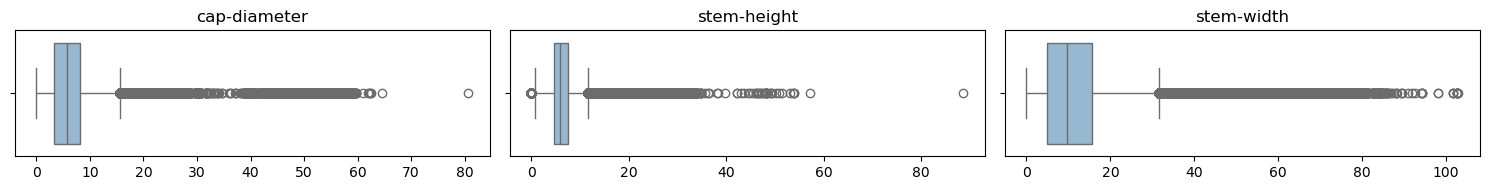

In [56]:
# Select numerical columns
num_cols = train.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col != "id"]  # Exclude "id" if needed

# Set up the figure size (3 columns per row)
n_cols = 3
n_rows = (len(num_cols) // n_cols) + (len(num_cols) % n_cols > 0)  # Calculate number of rows

# Set up the figure size
plt.figure(figsize=(15, n_rows * 2))

# Loop through numerical columns and create boxplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=train[col], color="#8ebad9")
    plt.title(f"{col}")
    plt.xlabel("")
    
# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import mstats

num_cols = train.select_dtypes(include=['number']).columns

# Winsorize the numeric columns (using 1st and 99th percentiles)
for col in num_cols:
    train[col] = mstats.winsorize(train[col], limits=[0.01, 0.01])
    test[col] = mstats.winsorize(test[col], limits=[0.01, 0.01])

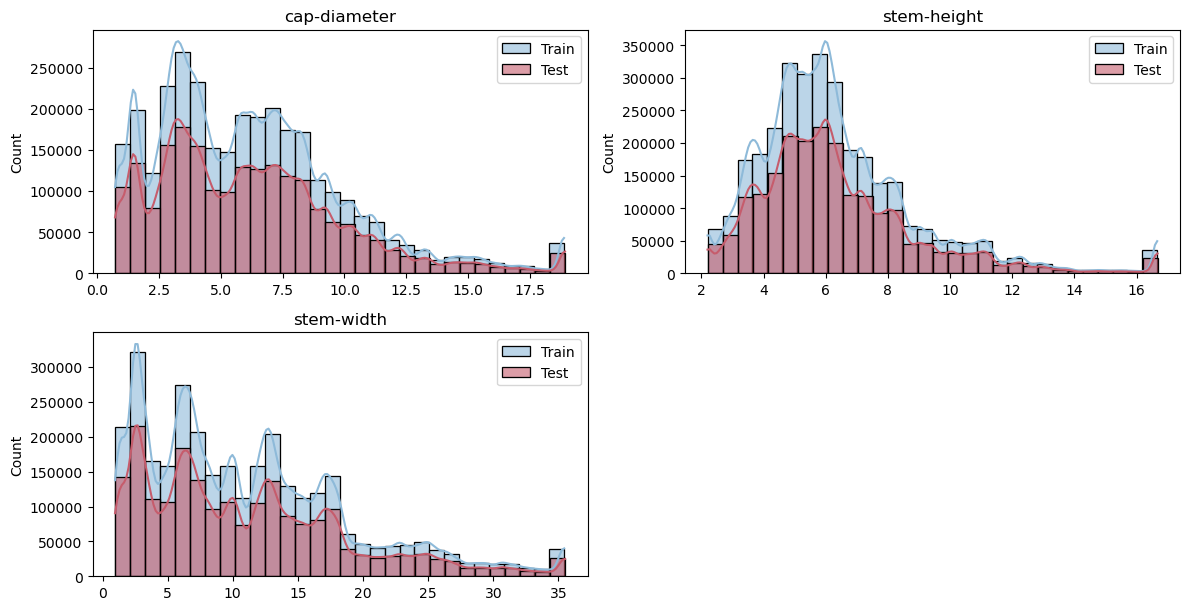

In [59]:
train_cols = train.select_dtypes(include=['number']).columns.tolist()
test_cols = test.select_dtypes(include=['number']).columns.tolist()

# Find common columns between train and test
common_cols = [col for col in train_cols if col in test_cols]

# Set up the figure size
plt.figure(figsize=(12, len(common_cols) * 3))

# Plot histograms for each common numerical column
for i, col in enumerate(common_cols, 1):
    plt.subplot(len(common_cols), 2, i)
    sns.histplot(train[col], bins=30, kde=True, color="#8ebad9", label="Train", alpha=0.6)
    sns.histplot(test[col], bins=30, kde=True, color="#c65c6c", label="Test", alpha=0.6)
    plt.title(f"{col}")
    plt.xlabel("")
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Duplicates

* I will keep these in the dataset for now because these may be genuine repetitions of the same mushroom species.
* This will be something to keep an eye on, especially since the test dataset does not have any duplicates. I may have to run the model once with and without the duplicates to better see results and avoid overfitting.

In [61]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")
print(f"Number of duplicate rows: {test.duplicated().sum()}")

Number of duplicate rows: 27657
Number of duplicate rows: 0


Normalization of Numeric Columns

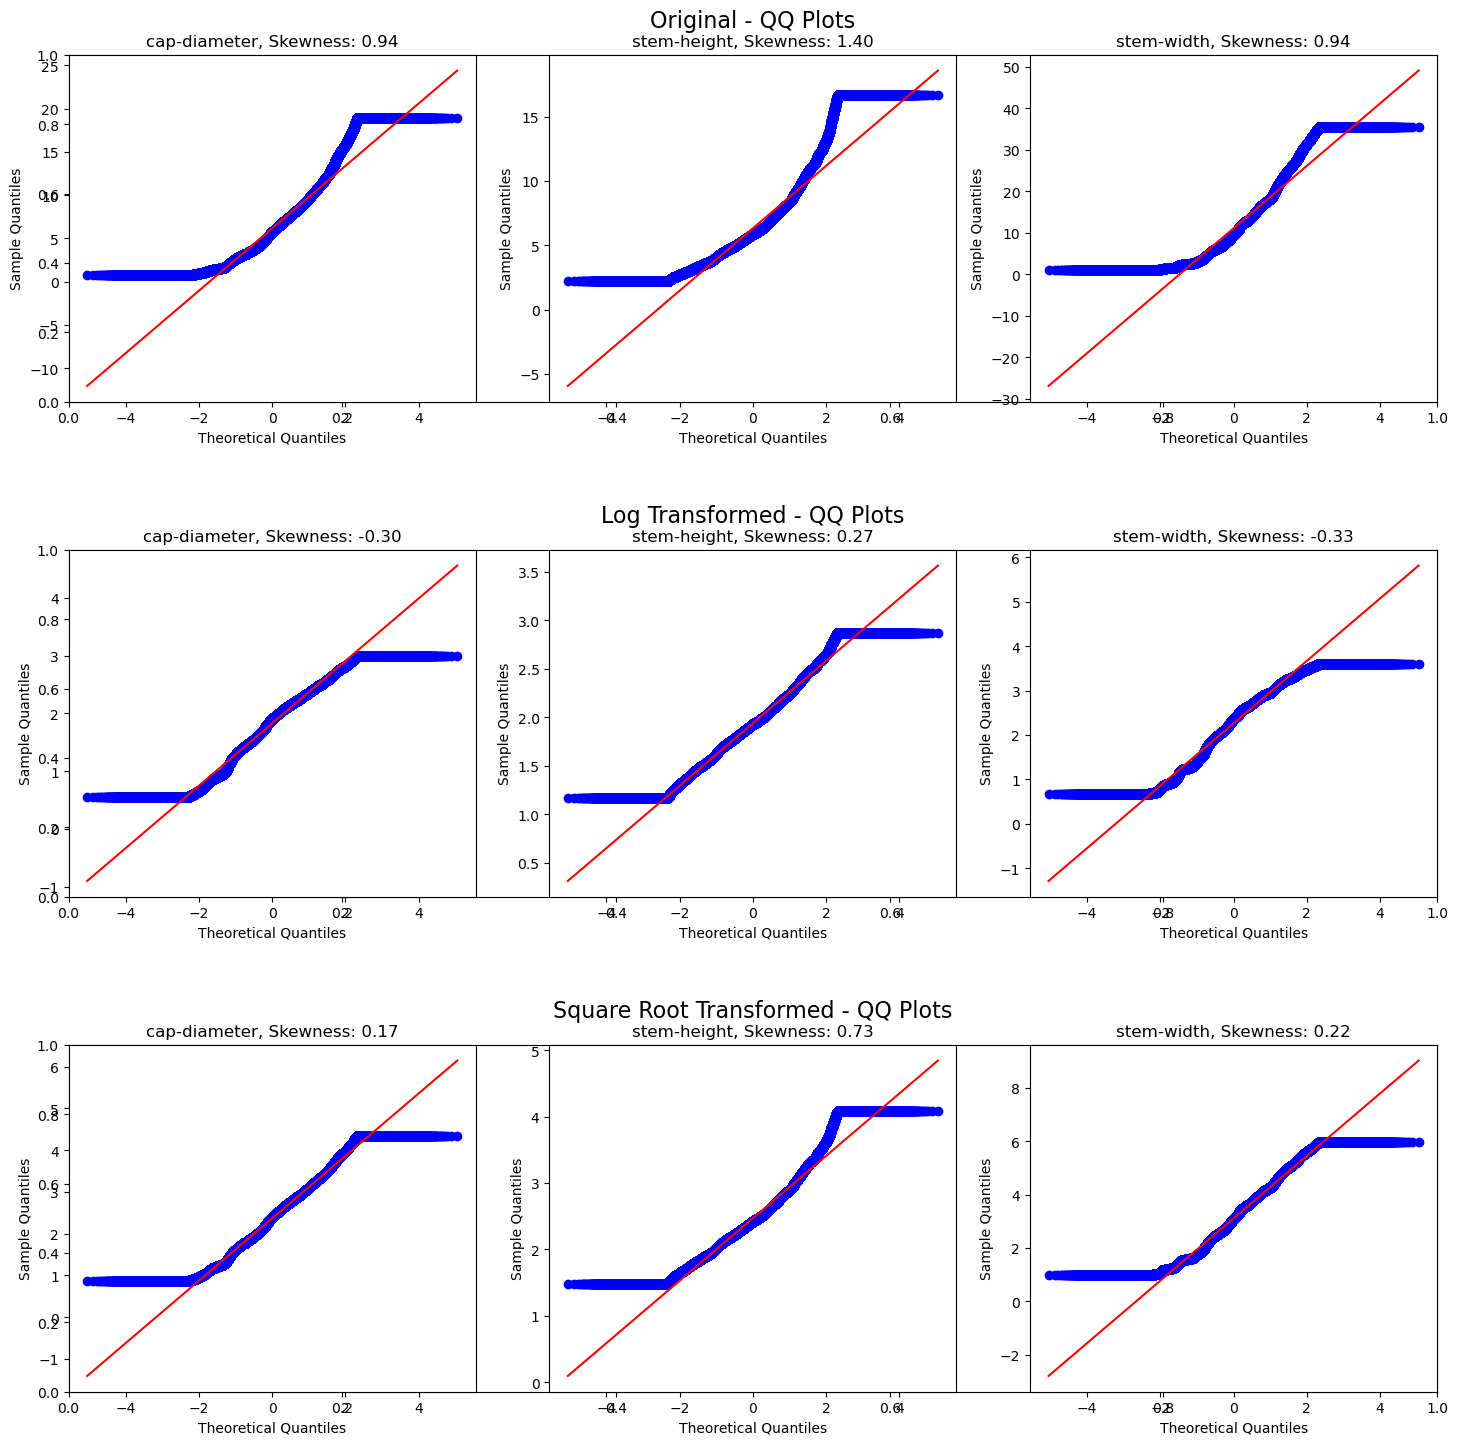

In [67]:
numerical_cols_train = train.select_dtypes(include=[np.number]).columns

# Set up figure size (3 columns per row, space between the sets)
n_cols = 3
n_rows = 3  # 3 sets for original, log, and square root

# Set up a larger figure with space between the sets
plt.figure(figsize=(15, 5 * n_rows))  # Adjusted height for each set to be well spaced

# Define transformations
transformations = ['Original', 'Log Transformed', 'Square Root Transformed']
transformed_data = [
    train[numerical_cols_train],  # Original data (Normal)
    np.log1p(train[numerical_cols_train]),  # Log transformed (log1p handles zeroes safely)
    np.sqrt(train[numerical_cols_train])  # Square root transformed
]

# Loop over transformations and plot
for j, (transformation, data) in enumerate(zip(transformations, transformed_data), 1):
    # Add super title for the transformation type
    plt.subplot(n_rows, 1, j)
    plt.title(f"{transformation} - QQ Plots", fontsize=16, pad=20)
    
    # Loop through each numerical column and create a QQ plot for each transformation
    for i, col in enumerate(numerical_cols_train, 1):
        plt.subplot(n_rows, n_cols, (j-1) * n_cols + i)
        
        # Calculate skewness
        skewness = data[col].skew()
        
        # Create QQ plot for the transformed column
        stats.probplot(data[col].dropna(), dist="norm", plot=plt)
        
        # Title with skewness value
        plt.title(f"{col}, Skewness: {skewness:.2f}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()

In [28]:
# Log transform all numerical columns
numerical_cols_train = train.select_dtypes(include=[np.number]).columns
numerical_cols_test = test.select_dtypes(include=[np.number]).columns.drop("id")

train[numerical_cols_train] = np.log1p(train[numerical_cols_train])
test[numerical_cols_test] = np.log1p(test[numerical_cols_test])

High-Cardinality

* Set all categories within each categorical column with less than 2% of all rows into a group called "Other"

In [29]:
categorical_cols_train = train.select_dtypes(include=["object"]).columns.drop("class")

# Set threshold for small categories
threshold = 0.05 * len(train)  # 5% of rows

# For both train and test datasets, process each categorical column
for col in categorical_cols_train:
    # Get the value counts for each category
    category_counts = train[col].value_counts()

    # Identify small categories (less than the threshold)
    small_categories = category_counts[category_counts < threshold].index

    # Replace small categories with 'Other'
    train[col] = train[col].replace(small_categories, "Other")

In [30]:
categorical_cols_train = train.select_dtypes(include=["object"]).columns.drop("class")
categorical_cols_test = test.select_dtypes(include=["object"]).columns

# For each categorical column in both train and test datasets
for col in categorical_cols_train:
    # Get the categories from the train dataset
    train_categories = train[col].unique()
    
    # Ensure that the test dataset only has categories from the train dataset
    test[col] = test[col].apply(lambda x: x if x in train_categories else "Other")

In [10]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
display("Unique Categories by Categorical Variable in Train", train[categorical_cols].nunique())

print("==========================================================")

categorical_cols = test.select_dtypes(include=['object', 'category']).columns
display("Unique Categories by Categorical Variable in Test", test[categorical_cols].nunique())

'Unique Categories by Categorical Variable in Train'

class                   2
cap-shape               5
cap-surface             8
cap-color               7
does-bruise-or-bleed    3
gill-attachment         8
gill-spacing            4
gill-color              7
stem-surface            5
stem-color              4
has-ring                3
ring-type               2
habitat                 4
season                  4
dtype: int64

'Unique Categories by Categorical Variable in Test'

cap-shape               5
cap-surface             8
cap-color               7
does-bruise-or-bleed    3
gill-attachment         8
gill-spacing            4
gill-color              7
stem-surface            5
stem-color              4
has-ring                3
ring-type               2
habitat                 4
season                  4
dtype: int64

Label Encode Target Variable

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])

One-Hot Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = train.select_dtypes(include=["object"]).columns

# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop="first")  # Fix applied here

# Fit on training data and transform both train & test datasets
train_encoded = encoder.fit_transform(train[categorical_cols])
test_encoded = encoder.transform(test[categorical_cols])

# Convert back to DataFrame with proper column names
train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Reset indices to align with original datasets
train_encoded.index = train.index
test_encoded.index = test.index

# Concatenate encoded columns with original datasets (excluding original categorical columns)
train = pd.concat([train.drop(columns=categorical_cols), train_encoded], axis=1)
test = pd.concat([test.drop(columns=categorical_cols), test_encoded], axis=1)

Split Dataset

In [33]:
X = train.drop(['class'], axis=1)
Y = train['class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## 4. Modelling

Models Used
* Logistic Regression
* XGBoost
* CatBoost
* LGBM

              precision    recall  f1-score   support

           0       0.72      0.73      0.73    282397
           1       0.78      0.77      0.77    340992

    accuracy                           0.75    623389
   macro avg       0.75      0.75      0.75    623389
weighted avg       0.75      0.75      0.75    623389

Matthews Correlation Coefficient: 0.5015


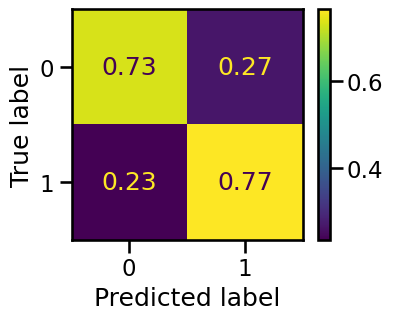

['Logistic Regression.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, matthews_corrcoef
import joblib

logit_model = LogisticRegression()

# Train the model
logit_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = logit_model.predict(X_test)

# Evaluate Model
print(classification_report(Y_test, y_pred))

mcc = matthews_corrcoef(Y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create a confusion matrix
cf = confusion_matrix(Y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=logit_model.classes_)

fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size as needed
disp.plot(ax=ax)
plt.show()

# Save Model
joblib.dump(logit_model, "Logistic Regression.pkl");

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Matthews Correlation Coefficient: 0.9812


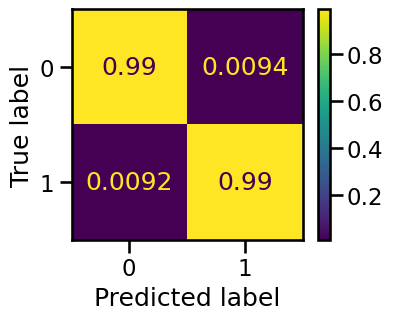

['XGBoost.pkl']

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, matthews_corrcoef
import joblib

# Create Model
xgb_model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Logarithmic loss
    use_label_encoder=False       # Avoid deprecated warning
)

# Fit Model
xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate Model
print(classification_report(Y_test, y_pred))

mcc = matthews_corrcoef(Y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create a confusion matrix
cf = confusion_matrix(Y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=logit_model.classes_)

fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size as needed
disp.plot(ax=ax)
plt.show()

# Save Model
joblib.dump(xgb_model, "XGBoost.pkl");

0:	learn: 0.6373299	test: 0.6373868	best: 0.6373868 (0)	total: 511ms	remaining: 8m 30s
200:	learn: 0.0508703	test: 0.0519100	best: 0.0519100 (200)	total: 59.7s	remaining: 3m 57s
400:	learn: 0.0420672	test: 0.0433548	best: 0.0433548 (400)	total: 1m 58s	remaining: 2m 57s
600:	learn: 0.0400958	test: 0.0416438	best: 0.0416438 (600)	total: 3m 1s	remaining: 2m
800:	learn: 0.0395077	test: 0.0411753	best: 0.0411753 (799)	total: 3m 43s	remaining: 55.6s
999:	learn: 0.0392020	test: 0.0409347	best: 0.0409347 (999)	total: 4m 22s	remaining: 0us

bestTest = 0.04093473314
bestIteration = 999

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Matthews Correlation Coefficient: 0.9817


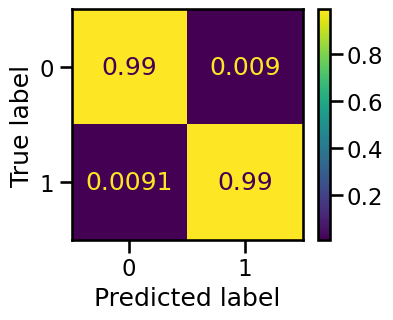

['CatBoost.pkl']

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, matthews_corrcoef
import joblib

# Create CatBoost model
cat_model = CatBoostClassifier(
    iterations=1000,         # Number of boosting iterations
    learning_rate=0.1,       # Learning rate
    depth=6,                 # Depth of trees
    loss_function='Logloss', # Suitable for binary classification
    verbose=200              # Print progress every 200 iterations
)

# Fit the model
cat_model.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50, verbose=200)

# Make predictions on the test set
y_pred = cat_model.predict(X_test)

# Evaluate Model
print(classification_report(Y_test, y_pred))

mcc = matthews_corrcoef(Y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create a confusion matrix
cf = confusion_matrix(Y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=logit_model.classes_)

fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size as needed
disp.plot(ax=ax)
plt.show()

# Save Model
joblib.dump(cat_model, "CatBoost.pkl")

[LightGBM] [Info] Number of positive: 1364404, number of negative: 1129152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547172 -> initscore=0.189251
[LightGBM] [Info] Start training from score 0.189251
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389

Matthews Correlation Coefficient: 0.9740


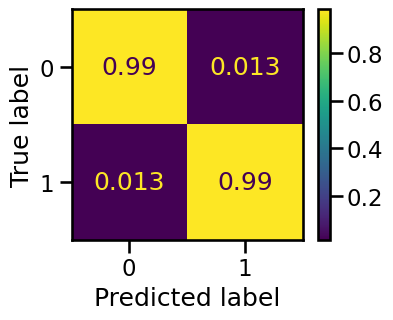

['LGBM.pkl']

In [22]:
import lightgbm as lgb
import joblib
from sklearn.metrics import classification_report, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay

# Create LGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate Model
print(classification_report(Y_test, y_pred))

mcc = matthews_corrcoef(Y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create a confusion matrix
cf = confusion_matrix(Y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=logit_model.classes_)

fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size as needed
disp.plot(ax=ax)
plt.show()

# Save Model
joblib.dump(lgb_model, "LGBM.pkl")


## 5. Deployment

In [35]:
X2 = test.drop(['id'], axis=1)
Y2_pred = cat_model.predict(X2)
Y2_pred = np.where(Y2_pred == 1, "p", "e")

submission = pd.DataFrame({
    "id": test["id"], 
    "class": Y2_pred
})

submission.to_csv("submission.csv", index=False)

print(submission.head(5))

        id class
0  3116945     e
1  3116946     p
2  3116947     p
3  3116948     p
4  3116949     e
